#Step 1: Prepare the Data

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
#tf.random.set_seed(1234).. don't think this is needed here...

##1a) Import the Data + Train Test Split

https://keras.io/api/datasets/mnist/

In [ ]:
#import the dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##1b) Visualize the Data

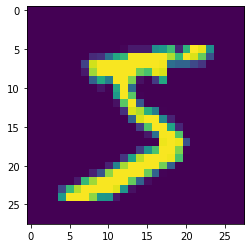

In [ ]:
plt.imshow(x_train[0])

#this is the very first image stored in x_train

In [ ]:
y_train[0]

#this is the corresponding LABELLED value (5) given to the first image
#in x_train[0]
#Meaning, this is pre-labelled, NOT trained nor predicted output.

5

In [ ]:
display(y_train)

# we preview the labels given to every single image stored 
# within the x_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
print(len(np.unique(y_train)))
#to see how many classes there are... 10 classes (0 to 9 digits)

10


Label: 5


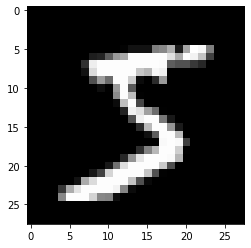

Label: 0


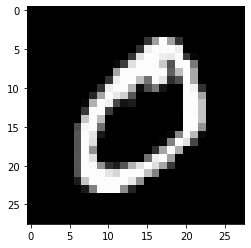

Label: 4


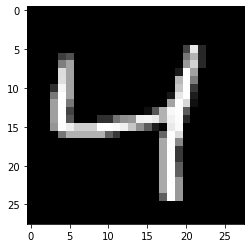

Label: 1


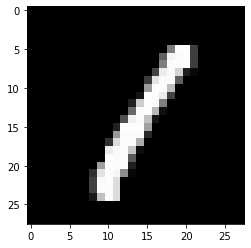

Label: 9


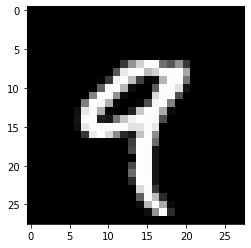

In [ ]:
for i in range(5):
  print(f'Label: {y_train[i]}')
  plt.imshow(x_train[i], cmap='gray')
  plt.show()

#we preview the first 5 images and their corresponding labels in the
#train dataset...

##1c) Normalize the Data

In [ ]:
#normalize the dataset
x_train, x_test = x_train/255, x_test/255
#pictures are from grayscale 0 to 255, so we divide by 255 to 
#normalize from 0 to 1 probability

#0 is pure black
#1 is pure white (or 255 is pure white)


##1d) One Hot Encoding

In [ ]:
#one hot encoding is
#not needed for sparse_categorical_crossentropy
#but needed for categorical_crossentropy

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

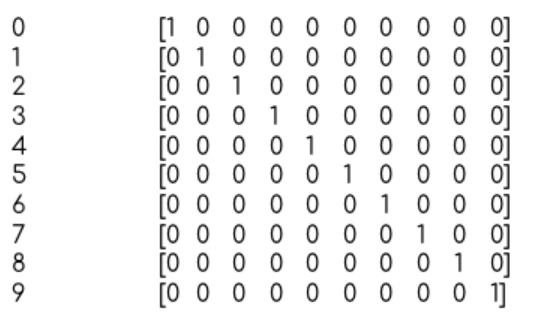

##1e) Mini example for One Hot Encoding

In [ ]:
#small example for to categorical

import numpy as np

y = np.array([0,1,2,3,1])
print(y)
print (to_categorical(y))

[0 1 2 3 1]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]




---



#Step 2: Build the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

#Flattening means to
#convert a 28 by 28 matrix (the image) into a 784 vector
model.add(Flatten(input_shape=(28,28)))

#Dense only takes in vectors
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))

#10 classes = 10 nodes/perceptrons
#we use softmax for 3 or more classes
model.add(Dense(y_train.shape[1], activation = 'softmax'))

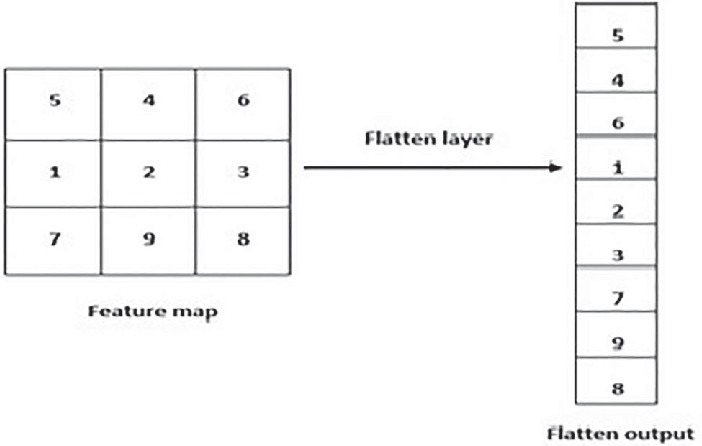

##2a) Summary of the Model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


##2b) Visualize the Model

In [ ]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


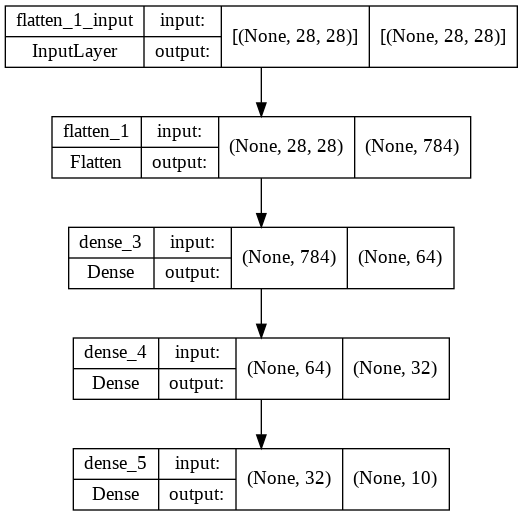

In [ ]:
import pydot
keras.utils.plot_model(model,'model.png', show_shapes=True)

#u can see the model.png created in the folder
#at the left hand side



---



#Step 3: Compile the Model

adam is for classification

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', # output must be one-hotted
    metrics = ['accuracy'] #accuracy will be plotted out later for explanation
)

- adam is the best OPTIMIZER
- https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

- how to choose which LOSS?
- https://medium.com/analytics-vidhya/activation-functions-and-loss-functions-for-neural-networks-how-to-pick-the-right-one-542e1dd523e0

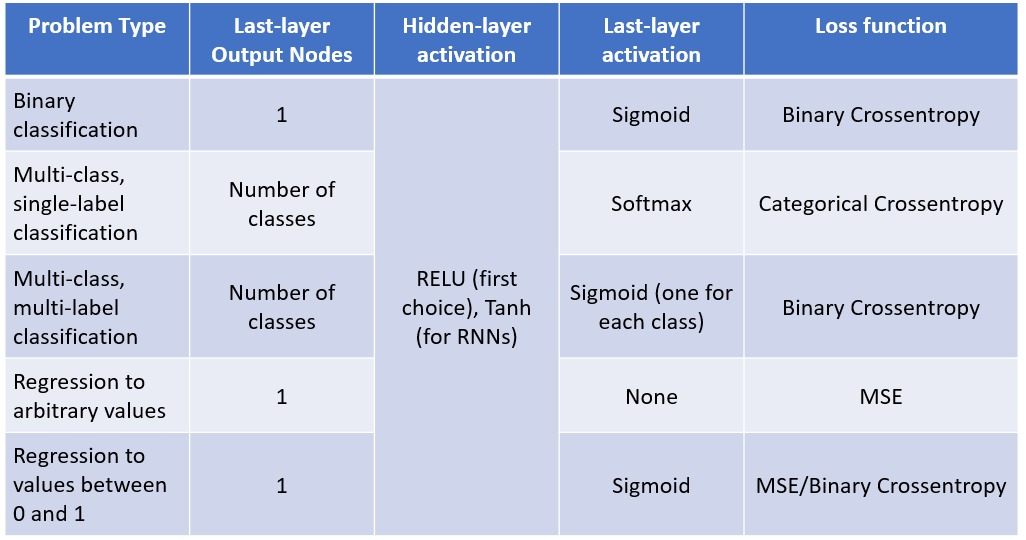

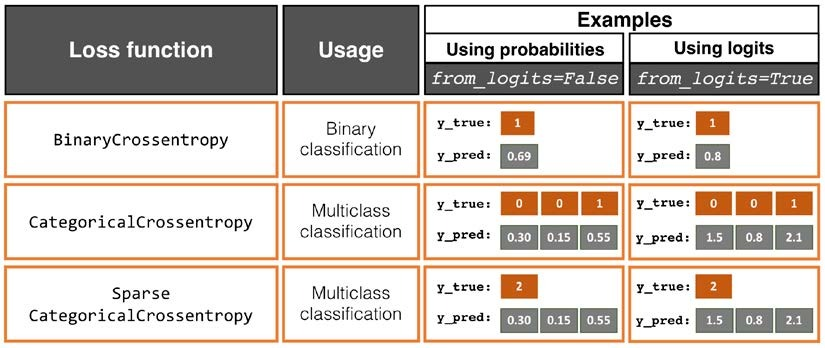



---



#Step 4: Train the Model

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3078 - accuracy: 0.9092 - val_loss: 0.1702 - val_accuracy: 0.9494
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1382 - accuracy: 0.9595 - val_loss: 0.1168 - val_accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1015 - accuracy: 0.9689 - val_loss: 0.1006 - val_accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0815 - accuracy: 0.9749 - val_loss: 0.0996 - val_accuracy: 0.9690
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0672 - accuracy: 0.9789 - val_loss: 0.0899 - val_accuracy: 0.9719
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0566 - accuracy: 0.9822 - val_loss: 0.0901 - val_accuracy: 0.9733
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0900 - val_accuracy:



---



#Step 5: Run a Prediction

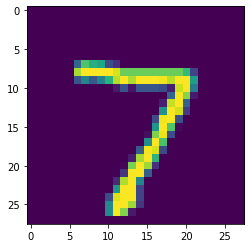

In [ ]:
plt.imshow(x_test[0])

#preview the image inside x_test[0]

In [ ]:
y_test[0]

#it was originally lablled as 7 (one hot encoded below)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
a = model.predict(x_test)
#fit the x_test to the model

In [ ]:
a[0]
# the model works! 
# the predicted value is 99.999% change that its a '7'
# as can be seen in the one hot encoded values below 
#(after the softmax layer)

#however, note that ANN is not meant to be used for image processing
#CNN is better used for image processing.... 
#thus this is just a showcase (prelimnary step before we use CNN)

array([2.1622395e-11, 3.7964185e-08, 2.0395939e-08, 2.3157761e-06,
       3.1118405e-13, 5.4209579e-08, 1.9920401e-18, 9.9999762e-01,
       1.0898040e-08, 1.9527086e-08], dtype=float32)



---



#Step 5: Visualize the Loss or Error

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

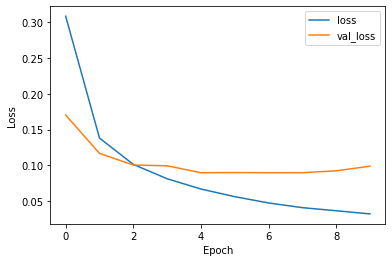

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epoch, loss, label = 'loss')
plt.plot(epoch, val_loss, label = "val_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


##5a) Visualize the Accuracy

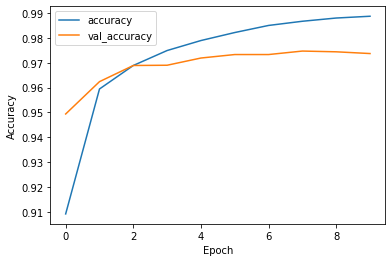

In [ ]:
plt.plot(epoch, acc, label = 'accuracy')
plt.plot(epoch, val_acc, label = "val_accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



---



#Step 6: Evaluate the Model

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

print(f'Testing Accuracy{acc:5.2f}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0991 - accuracy: 0.9737
Testing Accuracy 0.97




---




#THE END
---

